In [1]:
import tensorflow as tf
import  matplotlib.pyplot as plt
import random

In [2]:

# CıFAR-10 popüler bir veri seti. 
# Toplamda 60 bin adet resim var 10 sınıfa ait

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Etiketler vektör olmalı yani tek boyuta sahip olmalı.
# Etiketleri tek boyuta düşürüyoruz
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
# resimlerin boyutu 50000,32,32,3 olarak çıktı verecek
# Burada 50 bin örnek sayısı. Yani kaç tane resim olduğu
# 32,32 bir resmin boyutu
# 3 ise resmin kanal sayısı

print("Resimlerin boyutu:", x_train.shape)
print("Etiketlerin boyutu:", y_train.shape)
print("Test Resimlerinin boyutu:", x_test.shape)

Resimlerin boyutu: (50000, 32, 32, 3)
Etiketlerin boyutu: (50000,)
Test Resimlerinin boyutu: (10000, 32, 32, 3)


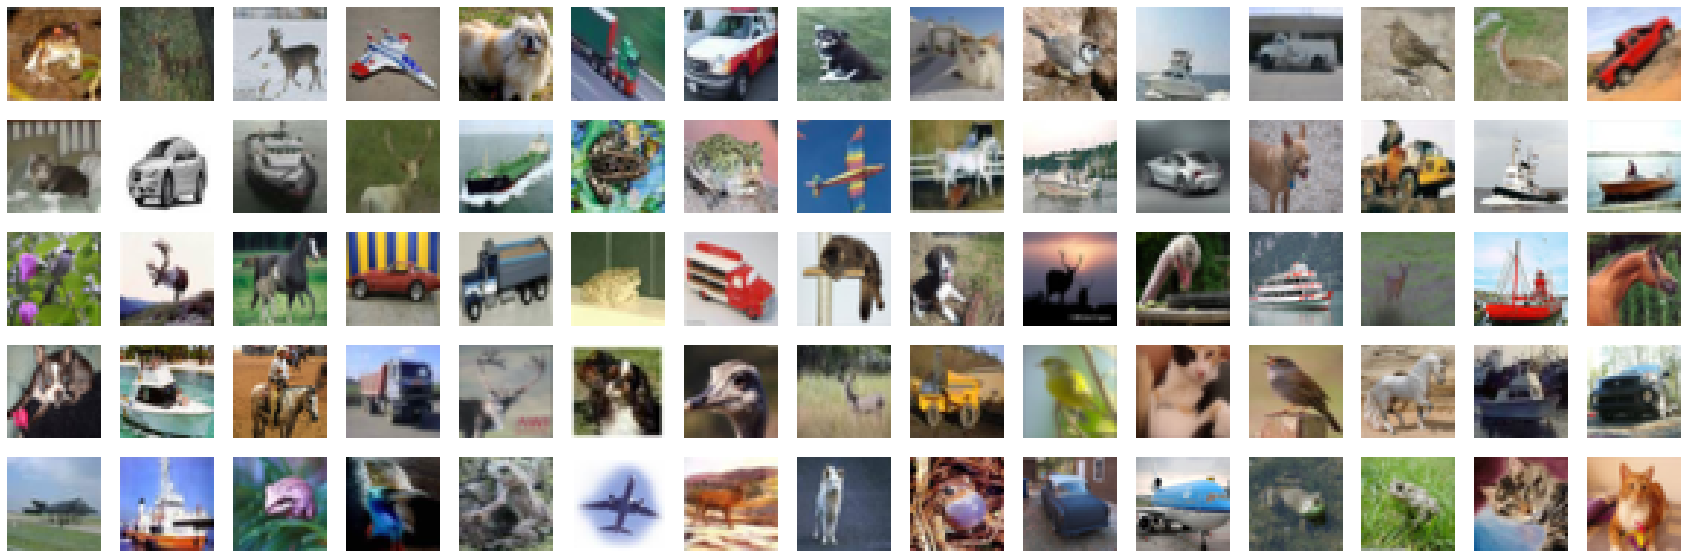

In [3]:
fig = plt.figure(figsize=(30,10))
for i in range(75):

    plt.subplot(5, 15, i+1)

    plt.imshow(x_train[i*10])
    
    plt.axis('off')

plt.show()

In [4]:
net1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
i=tf.keras.Input(shape=(32,32,3))
x=tf.keras.layers.Conv2D(16,(3,3),activation='relu')(i)
x=tf.keras.layers.MaxPooling2D(2,2)(x)
x  = tf.keras.layers.Flatten()(x)
x   = tf.keras.layers.Dense(512, activation='relu')(x)
x   = tf.keras.layers.Dropout(0.2)(x) 
out =tf.keras.layers. Dense(10, activation='softmax')(x)
net2 = tf.keras.models.Model(inputs=i, outputs=out)

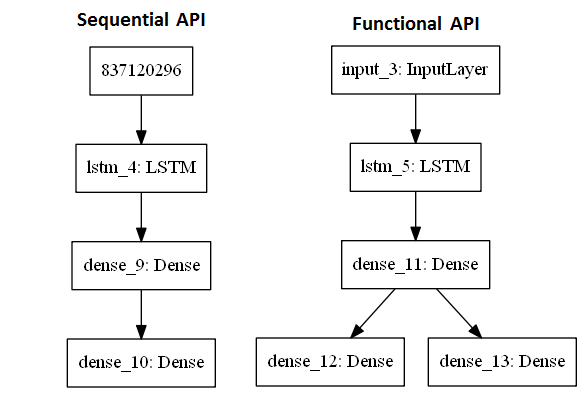

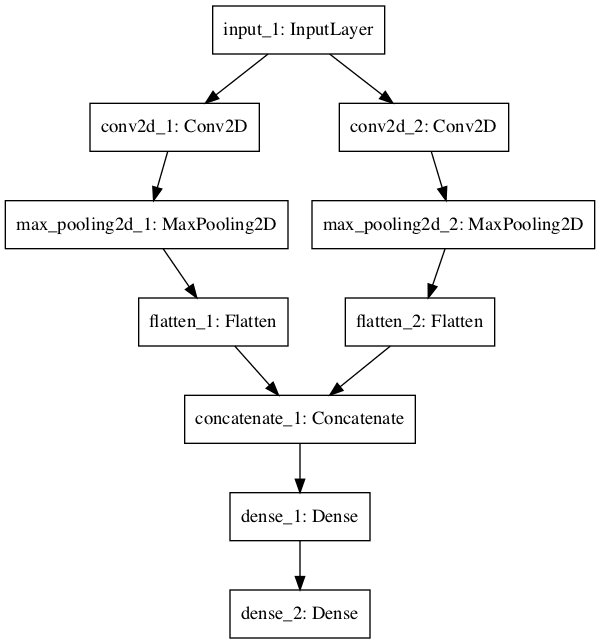

In [6]:
net1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1843712   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 1,849,290
Trainable params: 1,849,290
Non-trainable params: 0
______________________________________________

In [7]:
net2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1843712   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130  

In [8]:

from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16


vgg_model = VGG16(
    input_shape=[32,32,3], weights='imagenet', include_top=False)

for layer in vgg_model.layers:
  layer.trainable = False
fl = Flatten()(vgg_model.output)
x = Dense(1024, activation='relu')(fl)
x=Dropout(0.2)(x)
out = Dense(10, activation='softmax')(x)
model = Model(inputs=vgg_model.input, outputs=out)

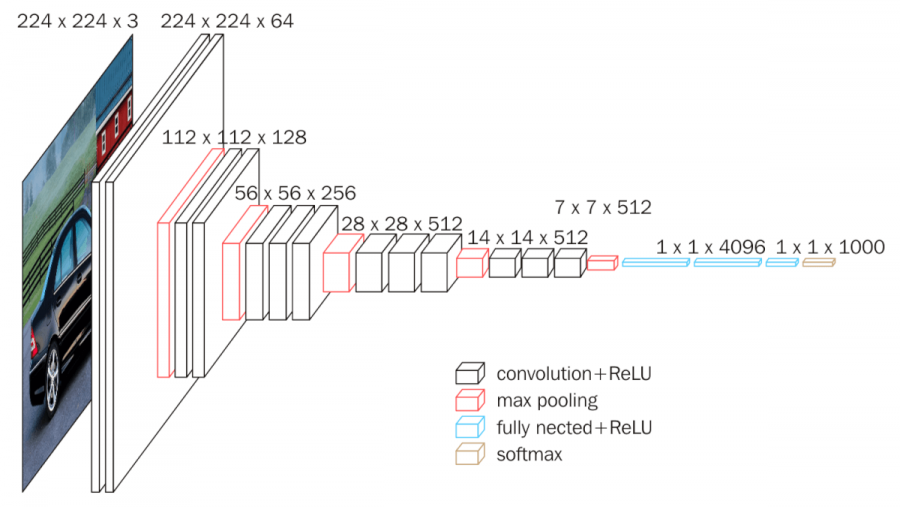

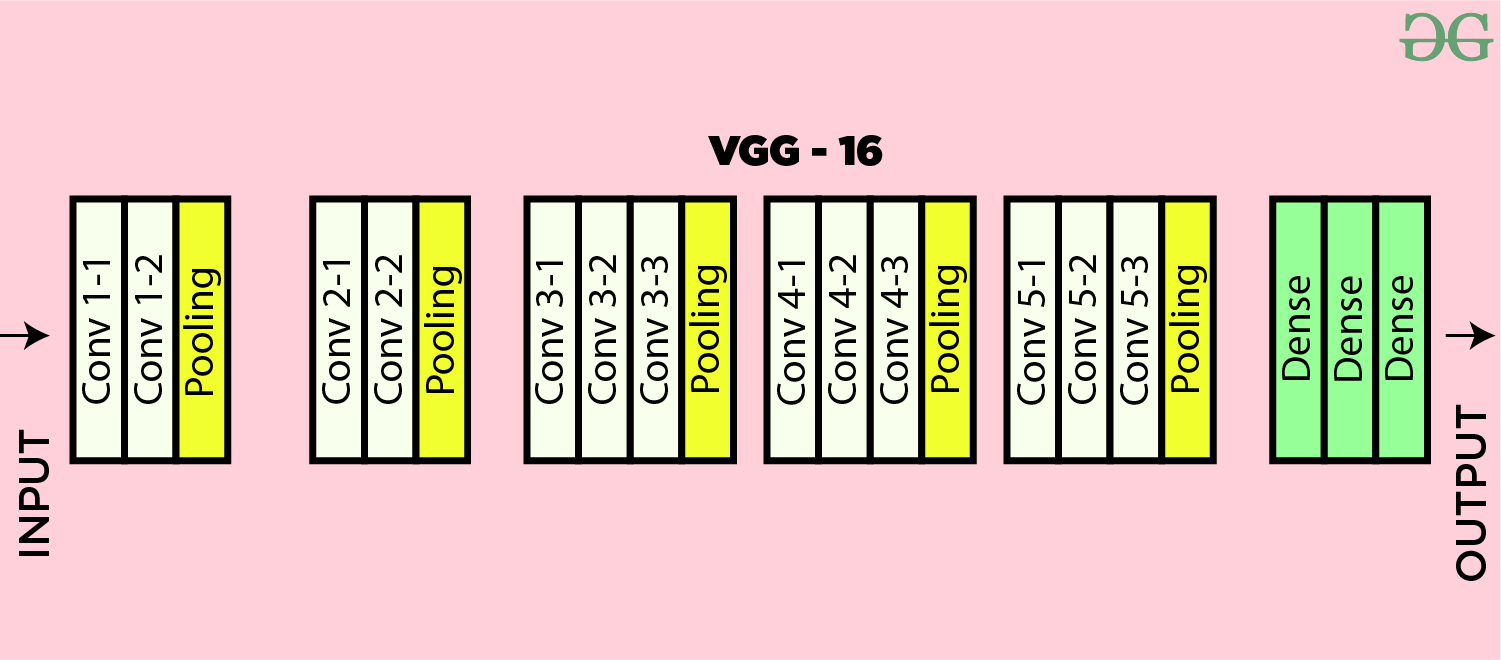

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [10]:
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
r = model.fit(x_train, y_train, 
              validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 98s 44ms/step - loss: 1.3428 - accuracy: 0.5277 - val_loss: 1.2273 - val_accuracy: 0.5637
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1759 - accuracy: 0.5843 - val_loss: 1.1717 - val_accuracy: 0.5880
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1098 - accuracy: 0.6107 - val_loss: 1.1237 - val_accuracy: 0.6068
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0584 - accuracy: 0.6278 - val_loss: 1.1335 - val_accuracy: 0.5978
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0196 - accuracy: 0.6418 - val_loss: 1.1008 - val_accuracy: 0.6147
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9767 - accuracy: 0.6554 - val_loss: 1.1230 - val_accuracy: 0.6014
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9396 - accuracy: 0.6689 - val_loss: 1.1017 -

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 12s 38ms/step - loss: 1.0953 - accuracy: 0.6247


[1.095262885093689, 0.6247000098228455]

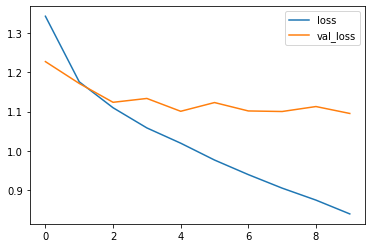

In [13]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

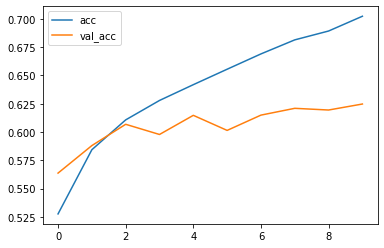

In [14]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
y_predict=model.predict(x_test).argmax(axis=1)

In [16]:
etiket = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

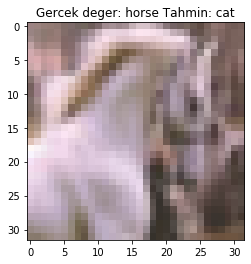

In [21]:
# Burada veri setindeki rastgele bir değerin
# gerçek değerini ve modelin tahmşn ettiği değeri
# kıyaslayıp veriyi gösteriyoruz.
i=random.randint(0, 9999)

plt.imshow(x_test[i])
# Rastgele Verinin gerçek adı
l1=etiket[y_test[i]]
# Rastgele verinin modelin tahmin ettiği adı
l2=etiket[y_predict[i]]
plt.title("Gercek deger: %s Tahmin: %s" % (l1,l2));